This is just an extention of the order segmentation notebook, except here each data point is a customer now. This should be pretty easy to follow after going through the order segmentation notebook.

The initial analysis is pretty much the same, only the clustering interpretation and deriving conclusions differ. If you have gone through the order segmentation notebook you are better off skipping the beginning and going right away to clustering and interpretation section.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl

In [2]:
import itertools

In [3]:
data = pd.read_csv('ulabox_orders_with_categories_partials_2017.csv')

In [4]:
data.head()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


In [5]:
data.describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
data[data['discount%']<0].sort_values(by='discount%', ascending=True)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
23632,7807,23632,11,-65.15,1,10,0.00,0.00,86.97,13.03,0.00,0.00,0.00,0.00
4554,1487,4554,9,-63.64,7,13,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
7185,2418,7185,9,-47.26,5,8,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
768,199,768,14,-39.84,6,8,28.97,0.00,71.03,0.00,0.00,0.00,0.00,0.00
16098,5379,16098,8,-26.15,3,13,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
23633,7807,23633,22,-23.98,3,19,7.74,0.00,39.63,52.63,0.00,0.00,0.00,0.00
22311,7423,22311,12,-23.89,2,11,15.93,0.00,28.08,0.00,0.00,0.00,55.98,0.00
7183,2418,7183,9,-20.59,3,13,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
7181,2418,7181,9,-20.59,2,20,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
7182,2418,7182,9,-20.59,2,8,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00


drinks% and negative discount are highly correlated, may be the company imposed a lot of inconvenience and transport charges on drinks

### Selecting samples

In [7]:
indices = [56,294,1024,10345,18995,567,5678]
data.iloc[indices, :]

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
56,4,56,32,3.10,3,19,36.49,53.59,9.92,0.00,0.00,0.00,0.00,0.00
294,59,294,34,11.39,1,13,0.00,0.00,53.03,15.70,23.44,7.83,0.00,0.00
1024,270,1024,57,2.28,3,13,8.74,0.00,22.19,36.63,4.84,0.00,22.22,5.38
10345,3553,10345,42,7.33,4,12,8.80,32.63,55.24,0.00,3.34,0.00,0.00,0.00
18995,6377,18995,24,2.23,3,11,43.04,0.00,46.70,10.26,0.00,0.00,0.00,0.00
567,136,567,8,6.91,4,9,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00
5678,1913,5678,48,2.32,2,22,11.18,36.39,35.22,1.42,0.00,0.00,0.00,15.79


In [8]:
no_orders = data['customer'].value_counts()

In [9]:
for i in range(data.shape[0]):
    data.loc[i, 'num_orders'] = no_orders[data.loc[i, 'customer']]

In [10]:
data.describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087,6.327067
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390,5.970311
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000,8.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.000000


In [11]:
frame = data.drop_duplicates('customer')

In [12]:
frame = frame.set_index('customer')

We are replacing Food%, Fresh% etc. of customers with the average among all the orders and adding an extra feature called number_orders.

In [13]:
customer_avg = data[['total_items','discount%','Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%','customer']].groupby('customer').mean()

In [14]:
frame[['total_items','discount%','Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%']] = customer_avg

In [15]:
frame.head()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders
customer,,,,,,,,,,,,,,
0,0,44.666667,14.110000,4,13,14.070000,73.203333,4.356667,6.200000,2.176667,0.000,0.000000,0.0,3.0
1,3,31.150000,17.849000,1,12,17.762000,52.909000,17.761000,3.207500,2.314500,4.352,1.695000,0.0,20.0
2,23,26.000000,2.970000,6,23,24.100000,22.290000,38.690000,14.920000,0.000000,0.000,0.000000,0.0,1.0
3,24,27.782609,4.102174,1,10,23.825652,51.280870,8.220870,14.773478,0.000000,0.000,1.898696,0.0,23.0
4,47,17.103448,4.373103,3,9,24.841379,51.082414,10.291034,13.035172,0.683793,0.000,0.065517,0.0,29.0


### Order Segmentation

let's try and find if there are any clusters among the orders that customers made.

There may not be any relevant information in the hour in which they ordered but the weekday in which they ordered may reveal some information about weekend buyers.

Let's remove customer, order and hour features from the data

In [16]:
df = frame.drop(['order', 'hour', 'weekday'], axis=1)

Let's try and do pca and t-sne of the features and see the explained variance and plots

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=11)
pca.fit(df.values)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
def pca_results(pca, df):
    dimensions = ['dimention {}'.format(i) for i in range(1,pca.n_components_+1)]
    fig, ax = plt.subplots(figsize=(18,12))
    components = pd.DataFrame(pca.components_)
    components.plot(ax=ax, kind='bar');
    labels = [str(s) for s in df.columns]
    ax.legend(labels)
    ax.set_ylabel('Feature Weights')
    ax.set_xticklabels(dimensions, rotation=90)
    for i, ev in enumerate(np.round(pca.explained_variance_ratio_, 3)):
        ax.text(i-0.04, ax.get_ylim()[1]+0.05, ev)
    plt.show()

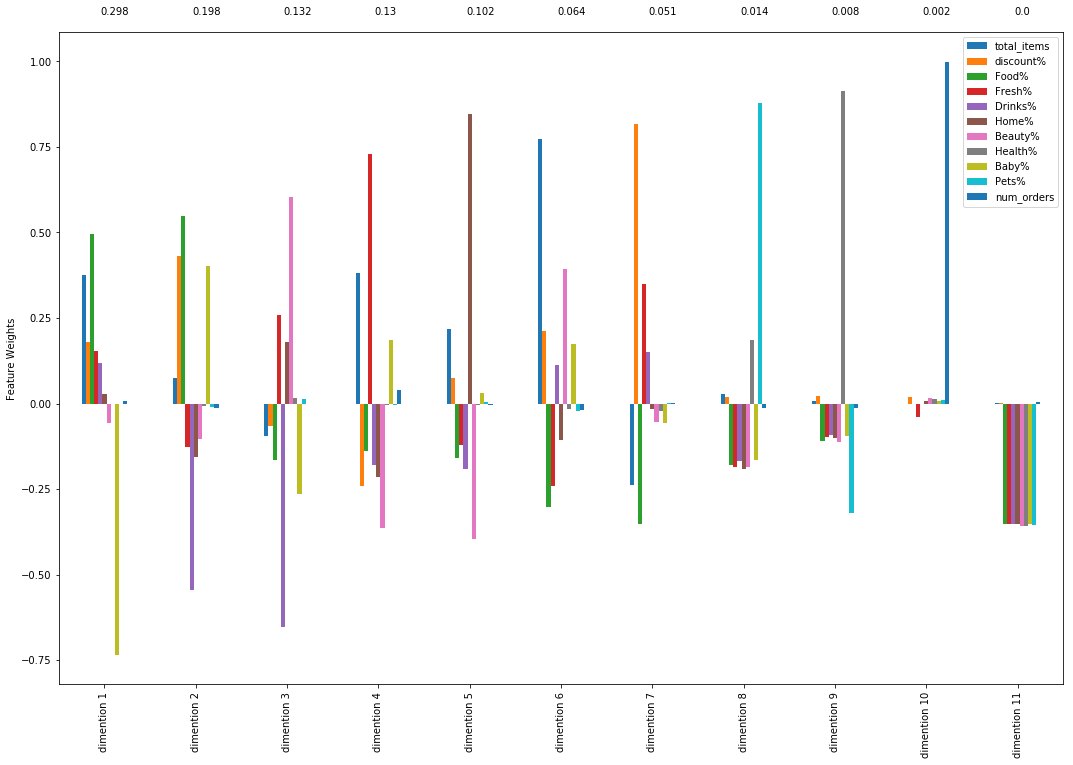

In [20]:
pca_results(pca, df)

In [21]:
def pca_2d_plot(pca, df):
    fig, ax = plt.subplots(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    ax.scatter(transformed_data[:,0], transformed_data[:,1], s=3)
    plt.show()

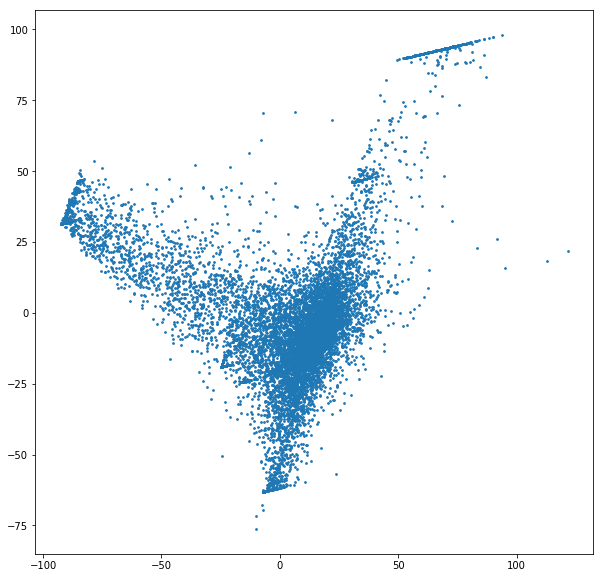

In [22]:
pca_2d_plot(pca, df)

In [23]:
def pca_2d_plot_arrow(pca, df):
    fig, ax = plt.subplots(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    ax.scatter(transformed_data[:,0], transformed_data[:,1], s=3)
    arrow_tail = (ax.get_xlim()[1]/2, ax.get_ylim()[1]/2)
    arrow_head = []
    for i in range(pca.components_.shape[1]):
        arrow_head.append((pca.components_[0,i], pca.components_[1,i]))
    for i in range(pca.components_.shape[1]):
        ax.arrow(arrow_tail[0], arrow_tail[1], arrow_head[i][0], arrow_head[i][1], fc='k', ec='k')
    plt.show()

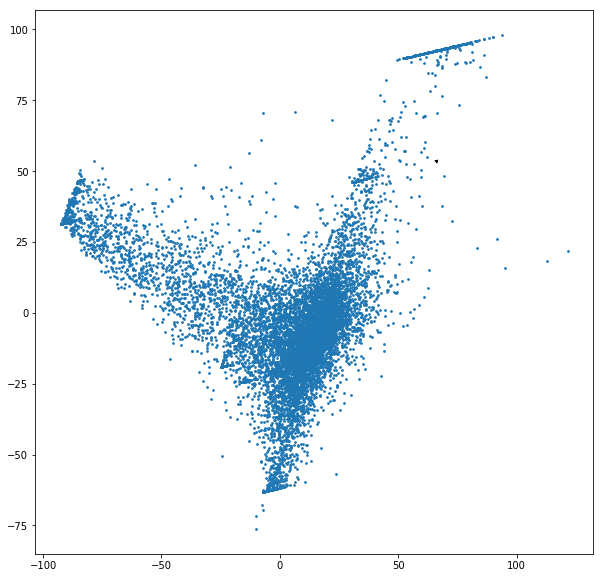

In [24]:
pca_2d_plot_arrow(pca, df)

<Figure size 1440x1440 with 0 Axes>

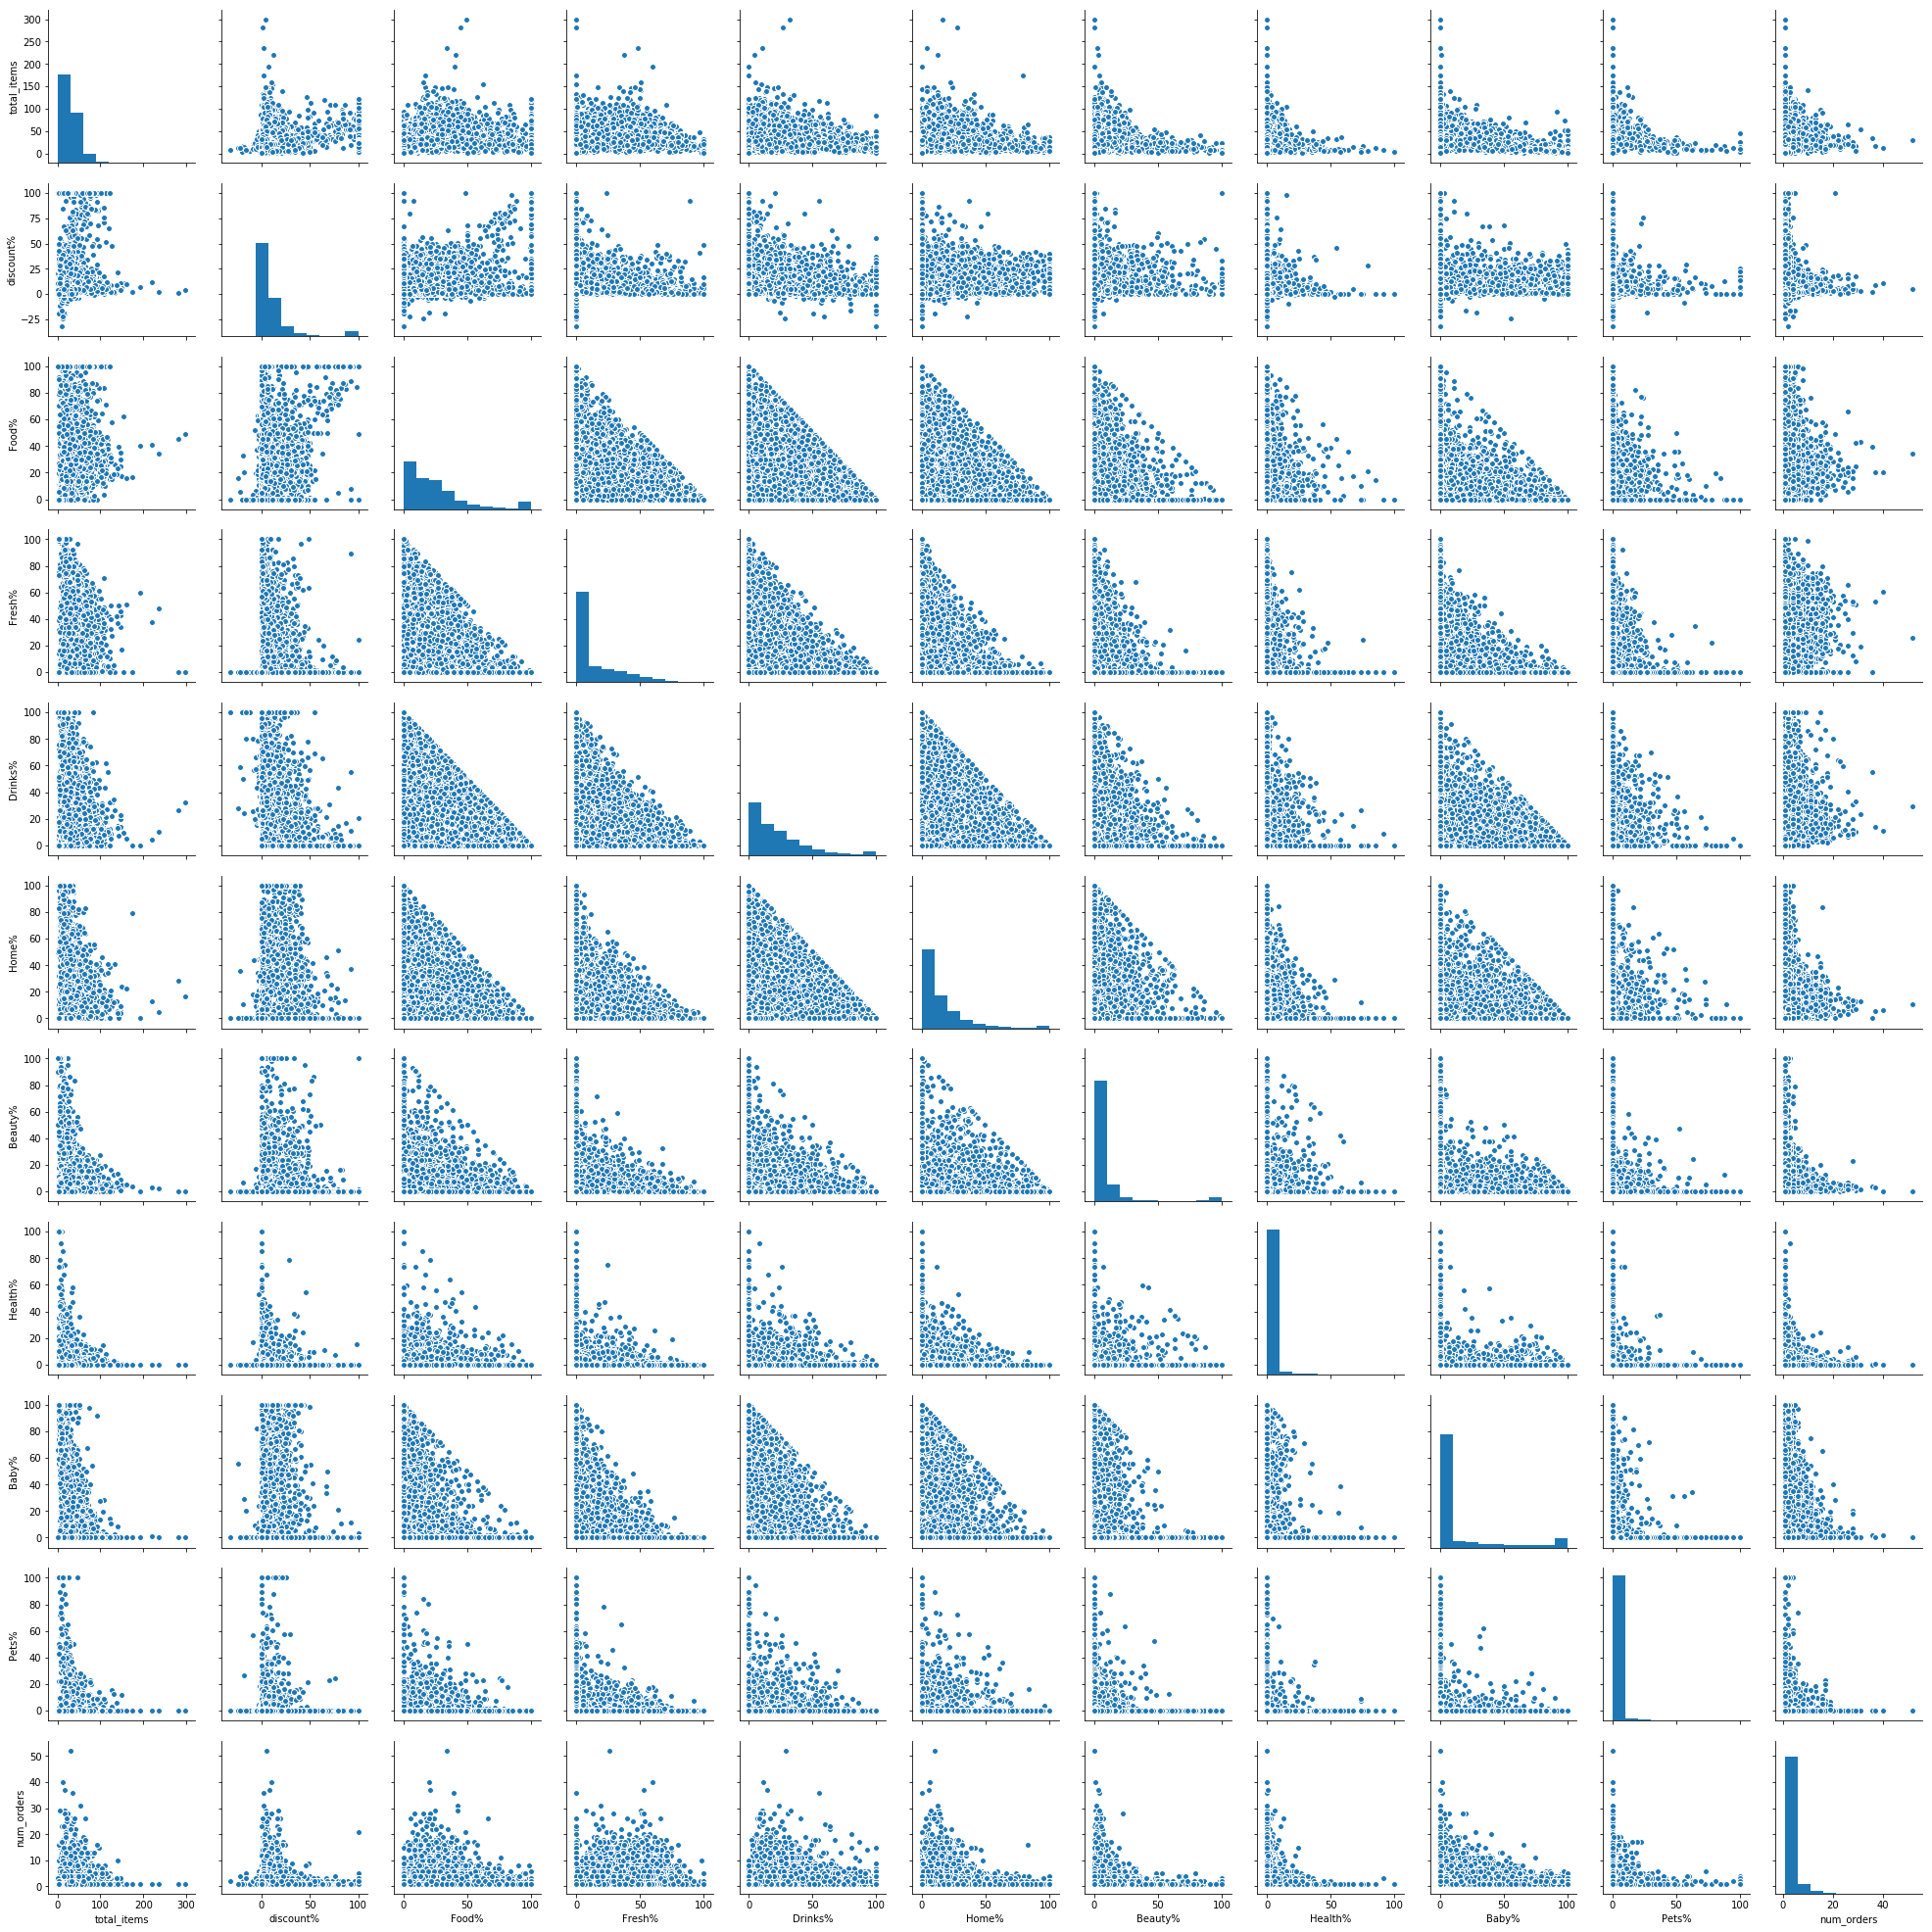

In [25]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(df);
plt.show()

In [26]:
def dependant_variable_detector(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    scaler = StandardScaler()
    lr = LinearRegression()
    columns = list(df.columns)
    for col in columns:
        y = scaler.fit_transform(df[col].values.reshape(-1,1))
        X = scaler.fit_transform(df.drop(col, axis=1).values)
        lr.fit(X,y)
        print('Using '+col+' as dependent variable R2 score is :'+str(lr.score(X,y)))

In [27]:
dependant_variable_detector(df)

Using total_items as dependent variable R2 score is :0.2721532836034287
Using discount% as dependent variable R2 score is :0.30395782977173746
Using Food% as dependent variable R2 score is :0.9914935858513225
Using Fresh% as dependent variable R2 score is :0.9868559613586135
Using Drinks% as dependent variable R2 score is :0.9898374751166672
Using Home% as dependent variable R2 score is :0.9852675174491302
Using Beauty% as dependent variable R2 score is :0.9866629058932479
Using Health% as dependent variable R2 score is :0.8483262198492896
Using Baby% as dependent variable R2 score is :0.9936921090049887
Using Pets% as dependent variable R2 score is :0.8985131646915558
Using num_orders as dependent variable R2 score is :0.10669825172834556


In [28]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    cax = ax.matshow(df_corr.values, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

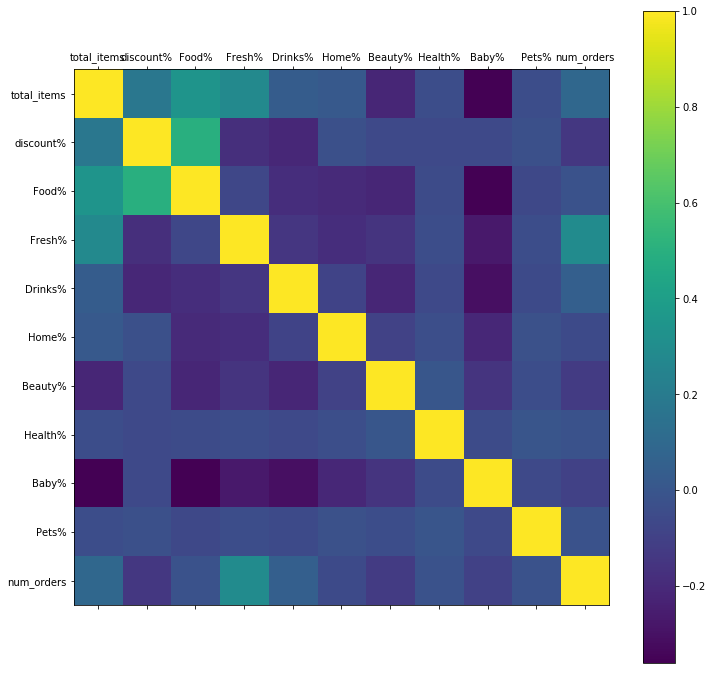

In [29]:
plot_corr_matrix(df)

## Outlier detection

/home/hari/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


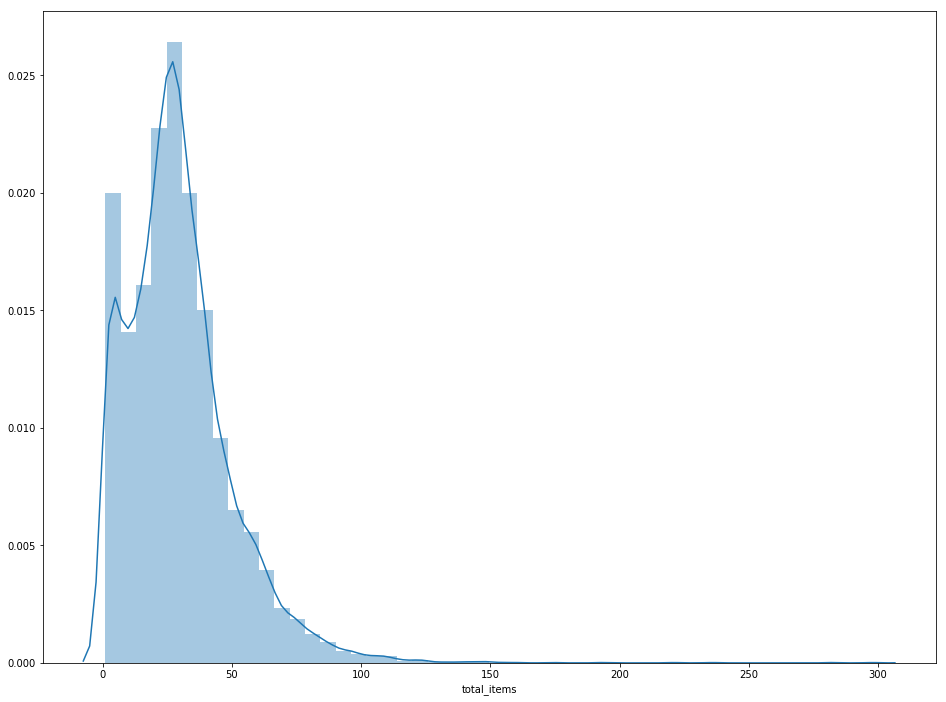

In [30]:
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

This distribution definitely has outliers, let's first apply a log transformations

/home/hari/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


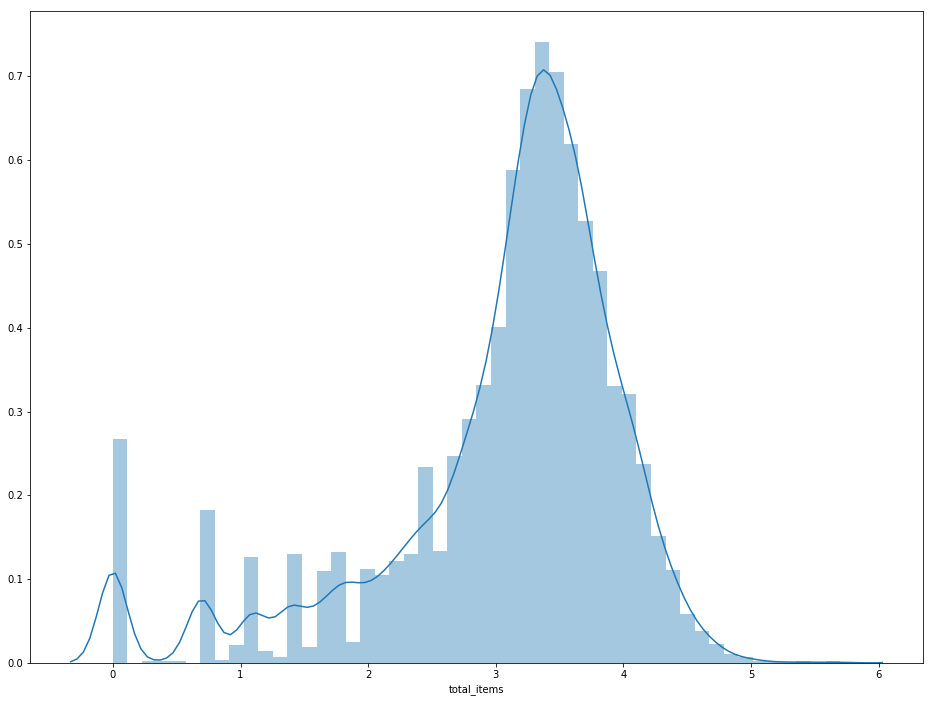

In [31]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

In [32]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]
        
    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index
        
    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))
        
    return outlier_indices

In [33]:
outlier_indices = turkey_outlier_detector(df)

_________________________
total_items-------->885
_________________________
discount%-------->919
_________________________
Food%-------->646
_________________________
Fresh%-------->351
_________________________
Drinks%-------->419
_________________________
Home%-------->517
_________________________
Beauty%-------->945
_________________________
Health%-------->10239
_________________________
Baby%-------->1918
_________________________
Pets%-------->10239
_________________________
num_orders-------->553


In [34]:
df.drop(outlier_indices['total_items'], inplace=True)

In [35]:
frame.drop(outlier_indices['total_items'], inplace=True)

## Are there clusters in the data, how many clusters?

In [36]:
from sklearn.cluster import KMeans

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
X = scaler.fit_transform(df.values)

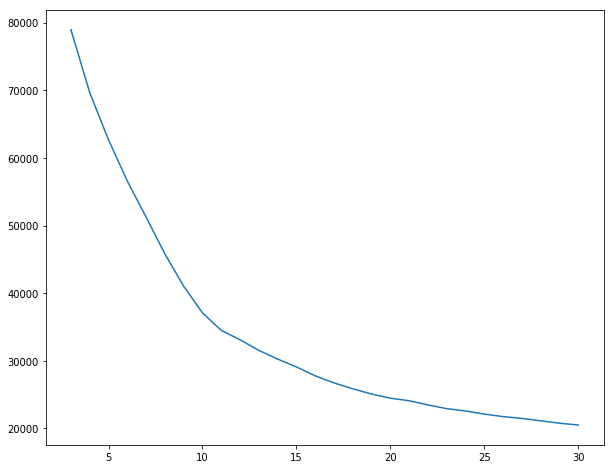

In [39]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

In [40]:
def hopkins_statistic(df):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    n_samples = df.shape[0]
    num_samples = [int(f*n_samples) for f in [0.25,0.5,0.75]]
    states = [123,42,67,248,654]
    for n in num_samples:
        print('-'*12+str(n)+'-'*12)
        hopkins_statistic = []
        for random_state in states:
            data = df.sample(n=n, random_state=random_state)
            nbrs = NearestNeighbors(n_neighbors=2)
            scaler = StandardScaler()
            X = scaler.fit_transform(data.values)
            nbrs.fit(X)
            sample_dist = nbrs.kneighbors(X)[0][:,1]
            sample_dist = np.sum(sample_dist)
            random_data = np.random.rand(X.shape[0], X.shape[1])
            nbrs.fit(random_data)
            random_dist = nbrs.kneighbors(random_data)[0][:,1]
            random_dist = np.sum(random_dist)
            hs = sample_dist/(sample_dist+random_dist)
            hopkins_statistic.append(hs)
            print('*'*25)
            print('hopkins statistic :'+str(hs))
        print('mean hopkins statistic :'+str(np.mean(np.array(hopkins_statistic))))
        print('hopkins statistic standard deviation :'+str(np.std(np.array(hopkins_statistic))))

In [41]:
hopkins_statistic(df)

------------2338------------
*************************
hopkins statistic :0.5932820816909677
*************************
hopkins statistic :0.5976491605957301
*************************
hopkins statistic :0.5958123882631345
*************************
hopkins statistic :0.595834085550575
*************************
hopkins statistic :0.5964341689900908
mean hopkins statistic :0.5958023770180996
hopkins statistic standard deviation :0.001425676321645275
------------4677------------
*************************
hopkins statistic :0.5857774781092855
*************************
hopkins statistic :0.5888031857494118
*************************
hopkins statistic :0.5855646403480878
*************************
hopkins statistic :0.5821975823293296
*************************
hopkins statistic :0.5874666504815123
mean hopkins statistic :0.5859619074035254
hopkins statistic standard deviation :0.0022225702648816965
------------7015------------
*************************
hopkins statistic :0.5796133381365673
*****

Not a great hopkins statistic score

In [42]:
def kth_nearest_data_point(df, k_max):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    ks = range(1,k_max+1)
    scaler = StandardScaler()
    X = scaler.fit_transform(df.values)
    nbrs = NearestNeighbors(n_neighbors=k_max)
    nbrs.fit(X)
    kneighbors_result = nbrs.kneighbors()[0]
    kth_neighbor_dist = list(np.sum(kneighbors_result, axis=0))
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, kth_neighbor_dist);
    plt.show()

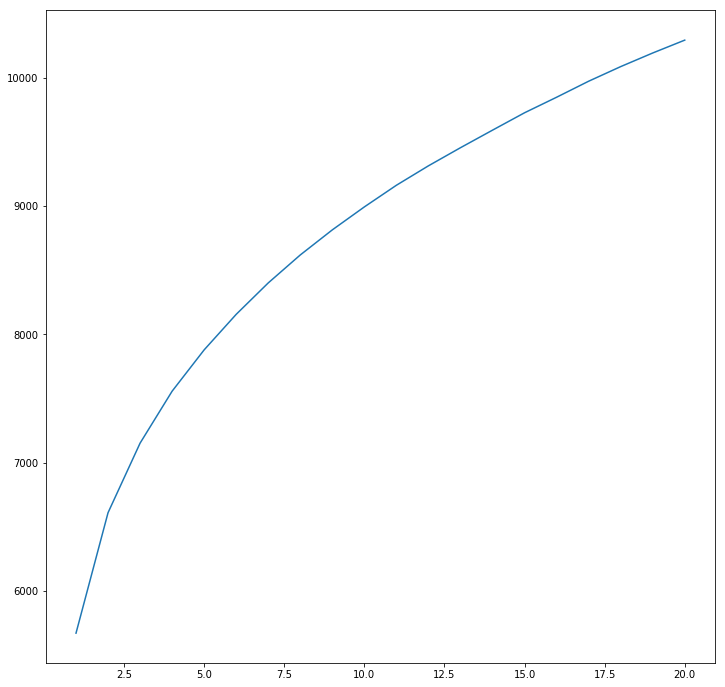

In [43]:
kth_nearest_data_point(df, 20)

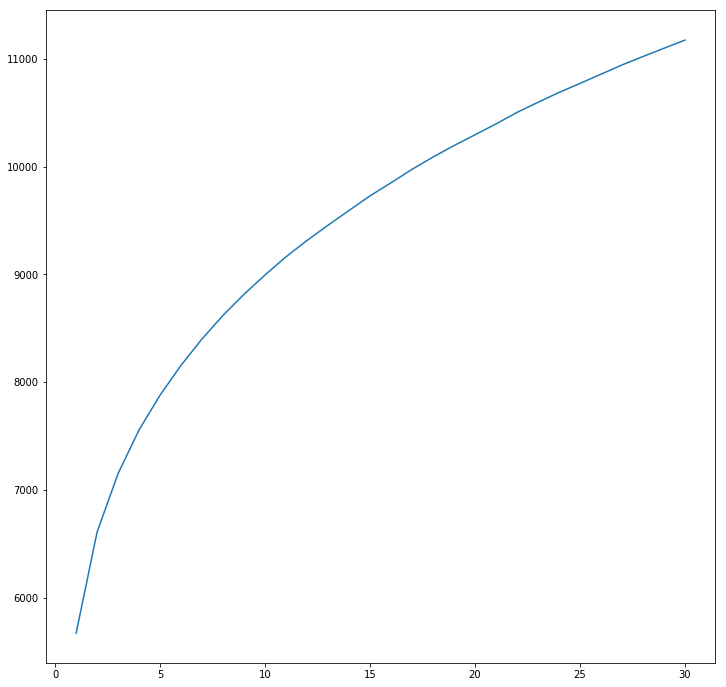

In [44]:
kth_nearest_data_point(df,30)

In [45]:
def plot_silhoutte_score(X, max_clusters=20):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

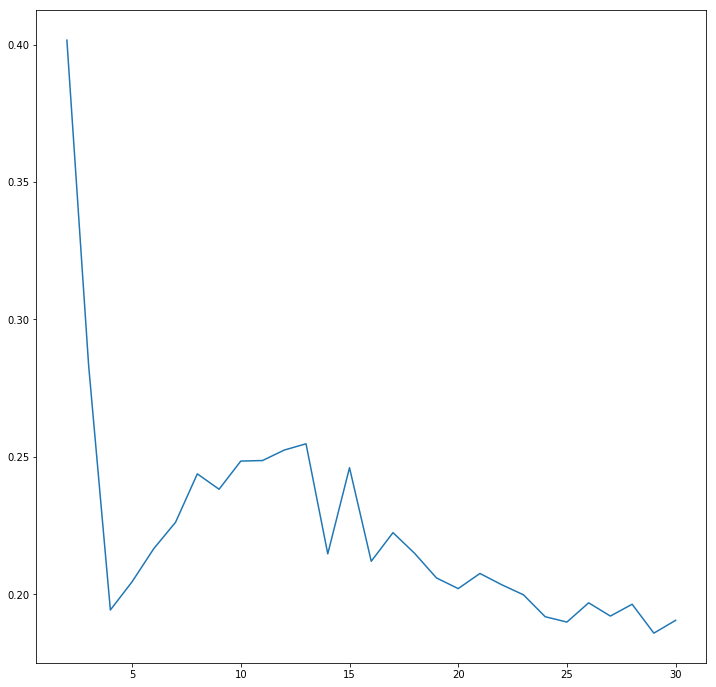

In [47]:
plot_silhoutte_score(X,30)

In [48]:
def ncomponents_of_gmm(X, min_components, max_components):
    from sklearn.mixture import GaussianMixture
    import itertools
    from scipy import linalg
    import matplotlib as mpl
    min_bic = np.inf
    bic = []
    n_components_range = range(min_components, max_components+1)
    cv_types = ['spherical','tied','diag','full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < min_bic:
                min_bic = bic[-1]
                best_gmm = gmm
        
    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, 2 components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    return best_gmm

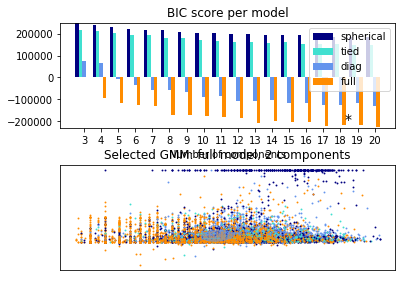

In [49]:
gmm = ncomponents_of_gmm(X, 3, 20)

In [50]:
gmm.covariance_type

'full'

In [51]:
gmm.n_components

20

In [52]:
def entropy(df):
    p_df = {}
    for col in df.columns:
        p_df[col] = df[col].value_counts()/len(df[col])
    entropy = sc.stats.entropy(pd.DataFrame(p_df))
    return entropy

In [53]:
entropy(df)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [54]:
def under_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    ks = range(1,k_max+1)
    UPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        UPM.append(kmeans.inertia_)
    fig, ax = plt.subplots(figsize=(14,14))
    ax.plot(ks, UPM);
    plt.show()
    return UPM

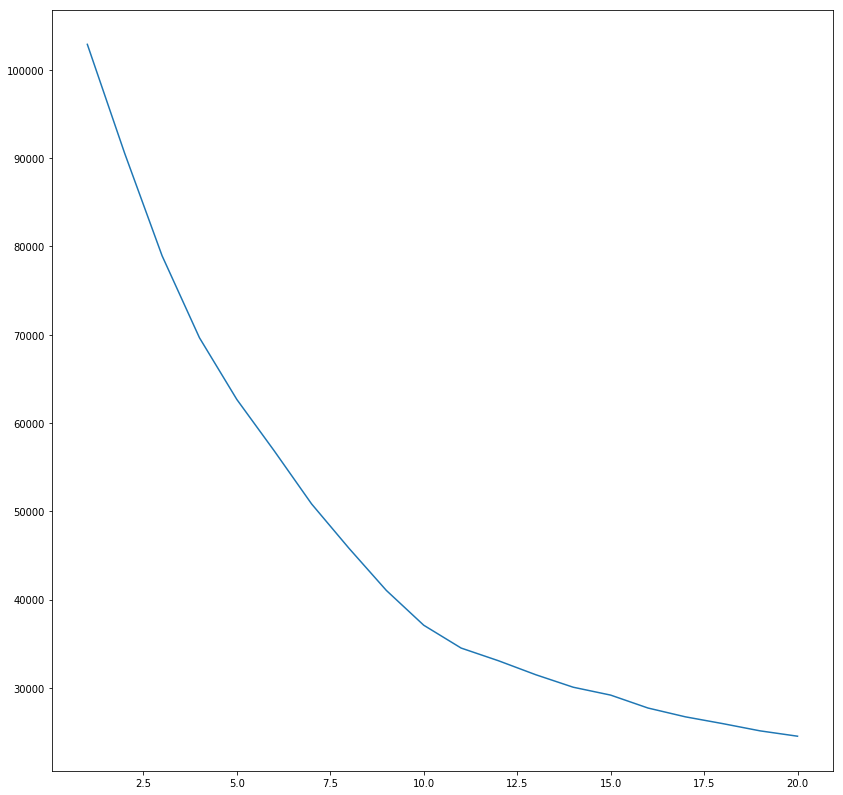

In [55]:
_ = under_partition_measure(X, 20)

In [56]:
def over_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import  pairwise_distances
    ks = range(1,k_max+1)
    OPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
        d_min = np.inf
        for pair in list(itertools.combinations(centers, 2)):
            d = pairwise_distances(pair[0].reshape(1,-1), pair[1].reshape(1,-1), metric='euclidean')
            if d<d_min:
                d_min = d
        OPM.append(k/d_min)
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, OPM)
    plt.show()
    return OPM

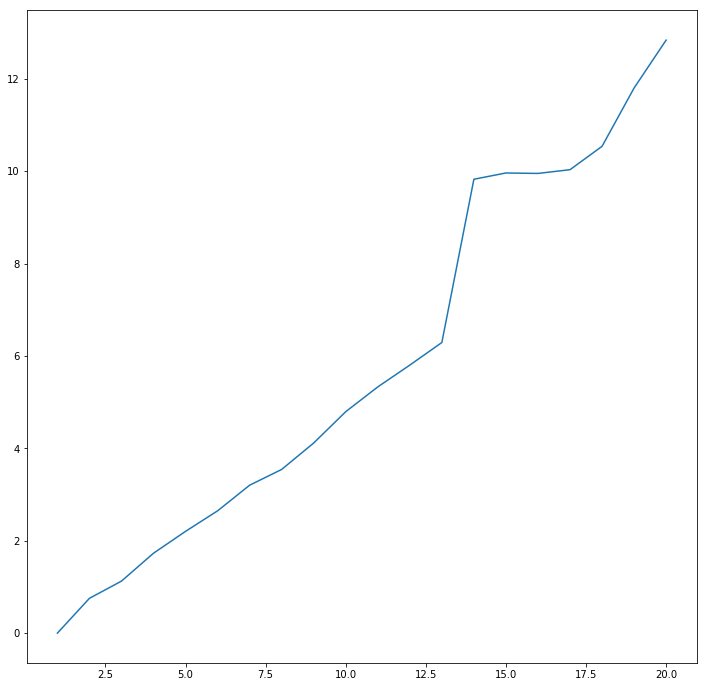

In [57]:
_ = over_partition_measure(X, 20)

In [58]:
def validity_index(X, k_max):
    UPM = under_partition_measure(X, k_max)
    OPM = over_partition_measure(X, k_max)
    UPM_min = np.min(UPM)
    OPM_min = np.min(OPM)
    UPM_max = np.max(UPM)
    OPM_max = np.max(OPM)
    norm_UPM = []
    norm_OPM = []
    for i in range(k_max):
        norm_UPM.append((UPM[i]-UPM_min)/(UPM_max-UPM_min))
        norm_OPM.append((OPM[i]-OPM_min)/(OPM_max-OPM_min))
        
    validity_index = np.array(norm_UPM)+np.array(norm_OPM)
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(range(1,k_max+1), validity_index)
    return validity_index

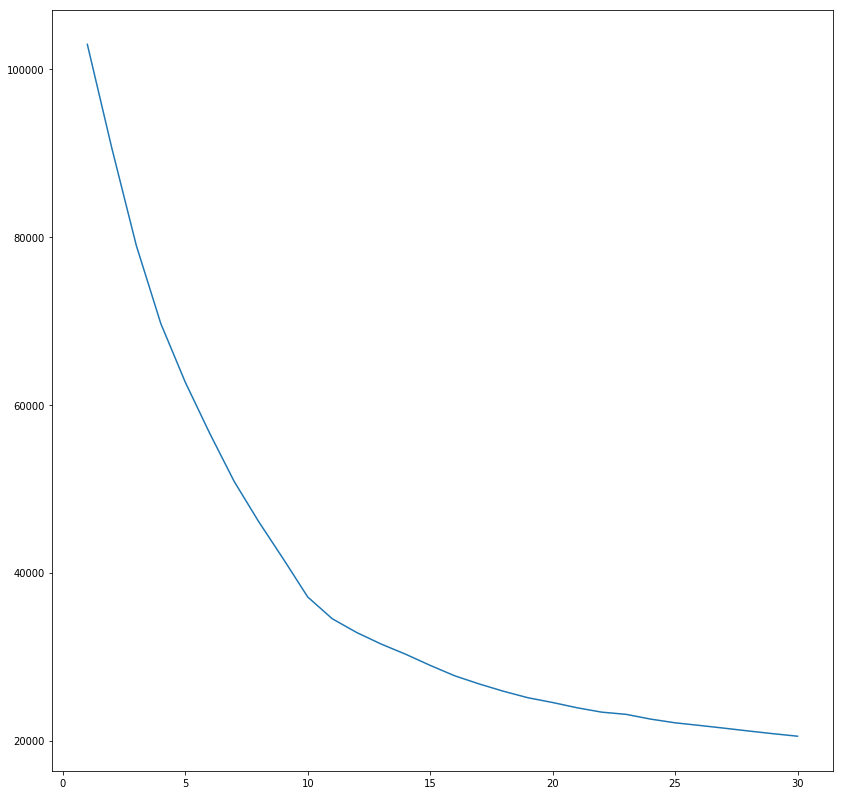

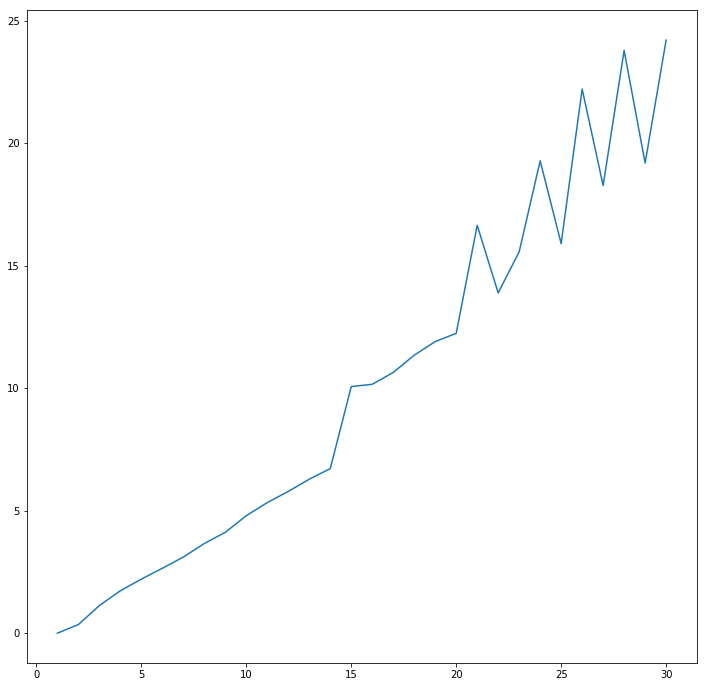

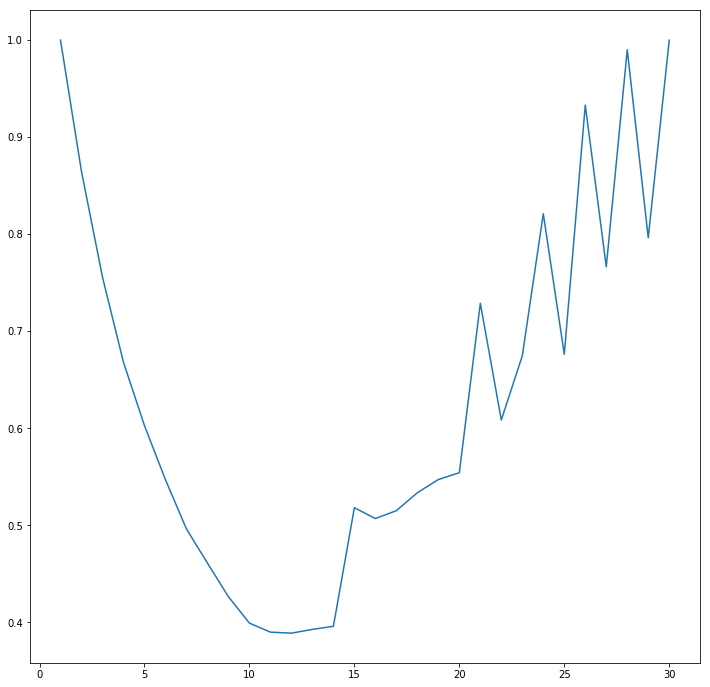

In [59]:
_ = validity_index(X, 30)

All our analysis so far suggests there could be around 10 clusters in the data, let's now manually examine and try to interpret the meaning of these clusters.

### Clustering and Interpretation

In [60]:
k = 10
kmeans_10 = KMeans(n_clusters=10)
kmeans_10.fit(X)
frame['labels'] = kmeans_10.predict(X)

In [61]:
frame[frame['labels']==0]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
customer,,,,,,,,,,,,,,,
10,111,24.500000,11.435000,1,19,7.150000,0.000000,0.000000,38.310000,51.450000,3.085000,0.000,0.000,2.0,0
37,192,22.333333,13.663333,3,8,8.296667,0.000000,0.000000,45.283333,40.943333,5.476667,0.000,0.000,3.0,0
52,258,10.000000,30.640000,7,21,0.000000,0.000000,0.000000,56.100000,43.900000,0.000000,0.000,0.000,1.0,0
119,514,21.000000,16.800000,2,19,22.710000,0.000000,0.000000,33.730000,43.550000,0.000000,0.000,0.000,1.0,0
145,590,13.600000,5.162000,2,11,10.792000,0.000000,0.988000,28.050000,48.114000,0.000000,0.000,12.054,5.0,0
165,654,27.000000,26.380000,3,22,0.000000,0.000000,4.760000,34.100000,53.870000,7.260000,0.000,0.000,1.0,0
196,759,5.000000,20.050000,3,16,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000,0.000,1.0,0
248,932,12.000000,2.450000,7,13,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000,0.000,1.0,0
300,1114,6.000000,0.000000,3,8,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000,0.000,1.0,0


In [62]:
frame[frame['labels']==0].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.0
mean,12480.769231,17.091667,13.176865,3.774038,15.423077,9.439858,2.274179,6.628490,10.662300,66.168133,1.446030,2.522909,0.452904,1.350962,0.0
std,9097.138710,10.143223,14.062245,2.215863,5.269899,13.104311,6.518065,10.609127,14.425311,23.718031,4.356036,9.445190,2.823083,0.826435,0.0
min,111.000000,4.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.633333,0.000000,0.000000,0.000000,1.000000,0.0
25%,4283.750000,8.000000,0.818750,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,45.345000,0.000000,0.000000,0.000000,1.000000,0.0
50%,9519.500000,14.500000,8.615000,3.000000,16.000000,2.755000,0.000000,0.000000,0.000000,57.615000,0.000000,0.000000,0.000000,1.000000,0.0
75%,19950.750000,24.000000,20.042500,6.000000,20.000000,14.866250,0.000000,10.030000,20.287500,94.237500,0.000000,0.000000,0.000000,1.000000,0.0
max,29978.000000,54.000000,60.605000,7.000000,23.000000,64.320000,37.490000,47.670000,56.100000,100.000000,23.120000,58.340000,28.030000,6.000000,0.0


-> These are the class of people who buy beauty products a lot, let's call them beauty concious people.<br>
-> Some seem to buy a lot of grocery and home products as well, should be mothers.<br>
-> These class of people seem to have placed very less number of orders, this a valuable point.<br>
-> ulabox can try for marketing strategies to appeal to these mothers.<br>
-> A campaigning event where these women get their hands on ordering from ulabox, for which they get some incentive will be a good idea.<br>
-> This should be held in market or a beauty parlour where these women are most likely to be seen.<br>

In [63]:
frame.loc[frame['labels']==0, 'class'] = 'beauty_concious'

In [64]:
frame[frame['labels']==1]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
0,0,44.666667,14.110000,4,13,14.070000,73.203333,4.356667,6.200000,2.176667,0.000000,0.000000,0.000000,3.0,1,NaN
7,90,40.000000,0.930000,1,20,23.700000,52.540000,13.930000,0.000000,9.830000,0.000000,0.000000,0.000000,1.0,1,NaN
13,127,32.000000,0.000000,1,9,0.000000,76.950000,0.000000,0.000000,8.280000,0.000000,14.770000,0.000000,1.0,1,NaN
16,136,16.000000,14.000000,5,13,0.000000,51.120000,28.300000,20.580000,0.000000,0.000000,0.000000,0.000000,1.0,1,NaN
17,137,53.000000,18.100000,1,15,11.650000,37.460000,12.650000,0.000000,0.000000,0.000000,38.240000,0.000000,1.0,1,NaN
18,138,20.600000,17.450000,6,12,19.776000,45.038000,21.022000,10.374000,3.792000,0.000000,0.000000,0.000000,5.0,1,NaN
19,143,28.000000,16.960000,1,23,11.696667,40.056667,35.300000,11.926667,0.000000,0.000000,1.020000,0.000000,3.0,1,NaN
23,156,28.000000,0.000000,4,23,6.980000,84.960000,8.060000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1,NaN
40,199,69.000000,3.160000,4,23,40.140000,48.300000,7.200000,1.580000,0.000000,0.000000,2.780000,0.000000,1.0,1,NaN


In [65]:
frame[frame['labels']==1].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.0
mean,17008.286095,40.744083,6.149378,3.689931,15.682472,21.648666,45.765669,16.035058,8.650533,4.045120,0.787052,2.242509,0.766773,3.004795,1.0
std,8339.135588,19.258012,6.858932,2.229806,5.764698,10.452003,14.779413,9.971978,7.466980,4.933388,2.170789,6.446747,2.762467,2.016055,0.0
min,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,20.635000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,10976.000000,28.000000,2.123333,2.000000,12.000000,14.351250,34.185000,8.725000,2.922500,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,17785.000000,37.000000,4.126667,3.000000,17.000000,21.027500,43.168000,14.830000,7.260000,2.513750,0.000000,0.000000,0.000000,2.000000,1.0
75%,24214.000000,49.500000,7.530000,6.000000,21.000000,28.275000,53.570000,21.852500,12.770000,6.016667,0.000000,0.000000,0.000000,4.000000,1.0
max,29980.000000,147.500000,92.000000,7.000000,23.000000,60.340000,100.000000,49.970000,47.368333,32.800000,18.980000,48.360000,23.170000,9.000000,1.0


-> These are the class of people who buy fresh products a lot.<br>
-> I call them regulars because they seem to buy stuff regularly, their order count percentiles are good.<br>
-> There's another class of customers whose order count is way more good, we will call them loyals, hence the name fresh regulars.<br>
-> People buy fresh products like vegetable, milk etc from a vendor they trust, ulabox has earned the trust of these people.<br>
-> ulabox should try to capitalize on this and convert them into their loyal customers.<br>
-> These people are potential customers who could go into the loyals category in near future.<br>

In [90]:
frame.loc[frame['labels']==1, 'class'] = 'fresh_regulars'

In [67]:
frame[frame['labels']==2]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
15,135,25.000000,10.980000,7,14,0.000000,12.290000,25.540000,51.250000,6.730000,4.190000,0.000000,0.000,1.0,2,NaN
26,162,25.000000,0.000000,1,18,6.880000,0.000000,24.650000,43.580000,3.700000,0.000000,0.000000,21.190,1.0,2,NaN
28,169,8.500000,15.345000,1,21,30.050000,0.000000,8.735000,61.215000,0.000000,0.000000,0.000000,0.000,2.0,2,NaN
43,216,25.666667,6.666667,3,15,0.000000,0.000000,25.176667,74.150000,0.673333,0.000000,0.000000,0.000,3.0,2,NaN
46,223,26.000000,23.840000,4,19,0.000000,13.080000,27.600000,35.930000,14.910000,8.480000,0.000000,0.000,1.0,2,NaN
49,247,5.000000,0.000000,3,14,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000,1.0,2,NaN
62,313,11.000000,24.630000,1,11,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000,1.0,2,NaN
66,319,38.000000,8.730000,5,2,17.710000,7.040000,20.600000,51.910000,2.740000,0.000000,0.000000,0.000,1.0,2,NaN
76,377,20.500000,14.575000,5,12,32.510000,0.000000,24.970000,39.690000,2.835000,0.000000,0.000000,0.000,2.0,2,NaN


In [68]:
frame[frame['labels']==2].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.0
mean,13489.860286,24.010310,14.778513,3.550055,14.734873,11.804696,2.751118,14.506242,57.757384,6.721276,0.669849,4.961027,0.712207,1.676568,2.0
std,9159.873613,12.785379,11.411471,2.141722,5.838606,11.731774,6.520028,13.600048,19.388881,8.787349,2.493694,11.278892,3.396209,1.217037,0.0
min,135.000000,4.250000,-2.810000,1.000000,0.000000,0.000000,0.000000,0.000000,28.550000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
25%,5460.000000,15.000000,6.365000,2.000000,11.000000,0.000000,0.000000,0.000000,42.980000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
50%,12131.000000,22.000000,12.920000,3.000000,15.000000,9.210000,0.000000,11.780000,52.130000,2.980000,0.000000,0.000000,0.000000,1.000000,2.0
75%,21423.000000,29.333333,21.260000,5.000000,20.000000,18.875000,0.460000,23.980000,67.540000,10.915000,0.000000,0.000000,0.000000,2.000000,2.0
max,29974.000000,86.000000,92.100000,7.000000,23.000000,57.030000,44.830000,55.540000,100.000000,41.780000,16.476667,55.040000,28.540000,16.000000,2.0


-> These class of people seem to spend a lot under the home products category, let's call them home decorators.<br>
-> Their order count percentiles are not bad.<br>
-> These also could contain mothers who buy more products and less beauty products.<br>
-> Same strategies as above can be used with them as well.<br>

In [69]:
frame.loc[frame['labels']==2, 'class'] = 'home_decorators'

In [70]:
frame[frame['labels']==3]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
100,435,82.250000,49.9625,1,21,81.620,0.000,15.8325,1.060,0.000,0.00,1.05,0.0,4.0,3,NaN
341,1248,6.000000,42.8600,3,10,100.000,0.000,0.0000,0.000,0.000,0.00,0.00,0.0,1.0,3,NaN
351,1263,21.000000,48.9500,3,9,76.340,15.740,3.9100,4.010,0.000,0.00,0.00,0.0,1.0,3,NaN
1370,4256,6.000000,50.0000,2,11,100.000,0.000,0.0000,0.000,0.000,0.00,0.00,0.0,1.0,3,NaN
1441,4449,22.000000,100.0000,4,0,100.000,0.000,0.0000,0.000,0.000,0.00,0.00,0.0,1.0,3,NaN
1472,4523,41.000000,70.3100,6,21,69.220,0.000,30.7800,0.000,0.000,0.00,0.00,0.0,1.0,3,NaN
1476,4540,40.000000,64.6000,2,15,64.600,0.000,0.0000,20.930,3.660,10.81,0.00,0.0,1.0,3,NaN
1477,4541,27.000000,100.0000,3,18,100.000,0.000,0.0000,0.000,0.000,0.00,0.00,0.0,1.0,3,NaN
1478,4542,39.500000,73.9750,4,23,75.030,1.275,7.2450,14.625,1.830,0.00,0.00,0.0,2.0,3,NaN


In [71]:
frame[frame['labels']==3].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.0
mean,9654.496124,51.222007,93.718264,3.782946,15.418605,97.108516,0.337429,0.860879,0.727506,0.328374,0.111906,0.403445,0.120930,1.211886,3.0
std,6163.549363,22.758098,13.955821,2.064860,4.970427,8.363146,2.156057,3.583508,3.718928,1.817458,1.136040,3.536679,1.680724,0.530484,0.0
min,435.000000,6.000000,33.330000,1.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
25%,5461.500000,32.000000,100.000000,2.000000,12.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
50%,7574.000000,52.000000,100.000000,3.000000,16.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
75%,9600.500000,66.000000,100.000000,5.500000,20.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
max,29769.000000,122.000000,100.000000,7.000000,23.000000,100.000000,24.240000,30.780000,34.410000,16.535000,15.420000,50.000000,24.080000,5.000000,3.0


-> These class of people have bought lots and lots of grocery at lots and lots of discount.<br>
-> Their order counts are fairly low, considering this they have supposedly ordered grocery only during the offer period.<br>
-> With the given data, considering the order count to be very less, whatever marketing strategy ulabox used has failed to stop churning of customers.<br>
-> Let's call these people grocery shoppers, remember they bought products mostly in discount.

In [72]:
frame.loc[frame['labels']==3, 'class'] = 'grocery_shoppers'

In [73]:
frame[frame['labels']==4]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
1,3,31.150000,17.849000,1,12,17.762000,52.909000,17.761000,3.207500,2.314500,4.352000,1.695000,0.000000,20.0,4,NaN
3,24,27.782609,4.102174,1,10,23.825652,51.280870,8.220870,14.773478,0.000000,0.000000,1.898696,0.000000,23.0,4,NaN
4,47,17.103448,4.373103,3,9,24.841379,51.082414,10.291034,13.035172,0.683793,0.000000,0.065517,0.000000,29.0,4,NaN
6,77,40.769231,2.683846,2,12,39.315385,23.766923,19.721538,5.633077,2.188462,0.000000,6.617692,2.756923,13.0,4,NaN
8,91,35.250000,23.670000,2,23,24.091250,37.566250,22.392500,12.033750,3.917500,0.000000,0.000000,0.000000,8.0,4,NaN
9,99,17.750000,3.004167,2,8,9.296667,64.840000,14.153333,3.257500,2.439167,5.390000,0.625000,0.000000,12.0,4,NaN
12,118,36.222222,1.961111,7,17,26.698889,3.593333,19.321111,14.591111,1.263333,0.144444,34.386667,0.000000,9.0,4,NaN
41,200,41.000000,20.261818,1,13,28.030909,39.912727,13.620000,7.469091,8.094545,2.873636,0.000000,0.000000,11.0,4,NaN
48,225,40.863636,18.805000,1,1,22.782273,47.901364,14.397727,5.881364,3.627727,0.000000,5.411364,0.000000,22.0,4,NaN


In [74]:
frame[frame['labels']==4].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.0
mean,14670.857391,33.569995,6.228436,3.459130,14.819130,22.827018,33.166813,19.948226,10.689696,3.976131,1.035922,7.490323,0.781026,12.793043,4.0
std,8353.099184,14.255616,6.454251,2.268858,5.684993,10.107456,18.634680,12.447872,6.865511,3.508303,2.001515,11.760801,2.604058,4.718629,0.0
min,3.000000,5.724138,-0.055217,1.000000,0.000000,0.842222,0.000000,1.666250,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.0
25%,8195.000000,24.641026,2.582984,1.000000,11.000000,15.777848,20.582745,11.351667,5.951444,1.588929,0.000000,0.000000,0.000000,10.000000,4.0
50%,14722.000000,31.272727,4.709091,3.000000,14.000000,21.462857,33.646000,17.169286,9.403529,3.173000,0.136000,0.726000,0.000000,12.000000,4.0
75%,21941.500000,39.767857,7.523333,6.000000,20.000000,28.556667,46.838154,25.139792,13.941143,5.115000,1.271667,10.962515,0.000000,15.000000,4.0
max,29918.000000,140.600000,100.000000,7.000000,23.000000,76.439091,80.708000,86.962353,46.759286,26.974444,13.377000,65.445000,22.751765,52.000000,4.0


-> These people seem to spend their money in every category, which means they depend on ulabox for all these categories.<br>
-> Their order counts are very impressive, implying that they are the most valuable customers of  ulabox.<br>
-> ulabox should make sure to keep these customers satisfied by giving them coupons and other incentives.<br>
-> ulabox should frame strategies to bring other customers into this category, the strategies which failed and succeeded can be judged by doing some data analytics in the generated data.<br>
-> Let's call them loyals and remember that they are the most valuable customers.<br>
-> In case of a shortage of resource or anything, catering the needs of these customers is a wise thing to do.<br>

In [75]:
frame.loc[frame['labels']==4, 'class'] = 'loyals'

In [76]:
frame[frame['labels']==5]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
38,195,23.666667,0.336667,4,12,17.540000,9.273333,56.716667,13.460000,3.010000,0.000000,0.0000,0.000000,3.0,5,NaN
45,220,19.333333,1.810000,1,14,7.506667,3.810000,56.563333,8.976667,14.426667,8.713333,0.0000,0.000000,3.0,5,NaN
50,248,31.166667,10.475000,7,12,20.966667,16.063333,54.378333,5.233333,2.111667,1.248333,0.0000,0.000000,6.0,5,NaN
57,292,39.000000,5.650000,4,20,6.030000,4.070000,49.060000,4.930000,0.000000,0.000000,35.9200,0.000000,1.0,5,NaN
58,293,17.000000,13.750000,3,14,12.550000,0.000000,69.470000,17.990000,0.000000,0.000000,0.0000,0.000000,1.0,5,NaN
59,294,34.000000,11.390000,1,13,0.000000,0.000000,53.030000,15.700000,23.440000,7.830000,0.0000,0.000000,1.0,5,NaN
80,389,17.500000,2.990000,4,21,15.900000,3.150000,44.050000,0.000000,0.000000,0.000000,36.9050,0.000000,2.0,5,NaN
85,404,13.000000,1.400000,4,22,10.140000,8.110000,52.340000,9.740000,0.000000,0.000000,0.0000,19.670000,1.0,5,NaN
97,432,19.000000,22.140000,7,23,30.340000,0.000000,69.660000,0.000000,0.000000,0.000000,0.0000,0.000000,1.0,5,NaN


In [77]:
frame[frame['labels']==5].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.0
mean,15354.925282,23.232889,6.714040,3.568202,15.059948,12.387918,4.034318,67.647154,9.479477,2.908908,0.426518,2.389108,0.493717,2.447437,5.0
std,8946.337521,11.531398,8.356405,2.071420,5.483006,11.244925,7.302398,17.923842,10.564590,5.557382,1.960247,7.254387,2.683462,1.762550,0.0
min,195.000000,4.250000,-31.820000,1.000000,0.000000,0.000000,0.000000,19.490000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.0
25%,7105.000000,15.000000,1.815833,2.000000,12.000000,1.295000,0.000000,53.360000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.0
50%,15277.000000,22.000000,4.730000,3.000000,15.000000,10.770000,0.000000,62.935000,5.927500,0.000000,0.000000,0.000000,0.000000,2.000000,5.0
75%,23257.500000,29.000000,8.682273,5.000000,19.000000,20.002500,5.287500,80.010000,16.418500,3.688333,0.000000,0.000000,0.000000,3.000000,5.0
max,29997.000000,89.000000,63.330000,7.000000,23.000000,57.870000,48.710000,100.000000,44.690000,36.820000,17.745000,46.240000,30.155000,15.000000,5.0


-> This class is a very large one, these people buy a lot of drinks.<br>
-> This may be for a party or a personal good time.<br>
-> Adding a greeting or wishes to these orders from the people of ulabox, wishing them a good time may give them a feeling of inclusion and care.<br>
-> They definitely are valuable customers.<br>

In [78]:
frame.loc[frame['labels']==5, 'class'] = 'drink_buyers'

In [79]:
frame[frame['labels']==6]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
129,551,12.000000,25.040000,2,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,100.000000,1.0,6,NaN
166,655,16.000000,12.640000,3,4,0.000000,0.000000,0.000000,0.000000,12.520000,0.000,0.000000,87.480000,1.0,6,NaN
332,1228,18.000000,0.000000,6,22,0.000000,0.000000,0.000000,0.000000,47.250000,0.000,0.000000,52.750000,1.0,6,NaN
374,1330,15.000000,14.010000,6,11,0.000000,0.000000,22.240000,32.540000,9.440000,0.000,0.000000,35.780000,1.0,6,NaN
529,1802,8.000000,4.795000,3,8,0.000000,0.000000,0.000000,12.780000,0.000000,0.000,31.275000,55.945000,2.0,6,NaN
542,1842,11.000000,5.015000,6,11,3.245000,0.000000,0.000000,0.000000,24.255000,9.135,0.000000,63.365000,2.0,6,NaN
572,1915,18.000000,14.590000,2,10,7.690000,4.820000,36.390000,0.000000,0.000000,0.000,0.000000,51.090000,1.0,6,NaN
681,2271,31.000000,18.140000,2,19,0.000000,0.000000,29.740000,30.270000,0.000000,0.000,0.000000,39.990000,1.0,6,NaN
831,2680,7.000000,5.470000,3,15,0.000000,0.000000,0.000000,3.380000,0.000000,0.000,34.420000,62.200000,1.0,6,NaN


In [80]:
frame[frame['labels']==6].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.00000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,15560.513158,17.776096,8.414024,3.618421,15.000000,8.57198,3.368132,12.564882,12.355667,4.153224,0.449901,2.199956,56.336086,1.907895,6.0
std,9378.008571,8.735165,8.082974,2.045920,5.401234,10.93730,7.998930,14.858734,15.065462,8.945168,1.943441,7.127122,24.096157,1.266782,0.0
min,551.000000,5.000000,-9.025000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.707500,1.000000,6.0
25%,6750.750000,10.375000,2.095000,2.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.757500,1.000000,6.0
50%,16571.500000,17.500000,6.107500,3.000000,15.000000,3.27250,0.000000,6.985000,8.860833,0.000000,0.000000,0.000000,50.235000,1.000000,6.0
75%,23121.250000,23.812500,14.140000,5.000000,19.250000,15.60000,1.665000,22.264167,18.918333,3.730250,0.000000,0.000000,72.437500,2.250000,6.0
max,29959.000000,46.000000,29.410000,7.000000,23.000000,36.26000,37.610000,53.580000,63.630000,47.250000,10.750000,34.420000,100.000000,6.000000,6.0


-> This is the class of pet lovers, they buy a lot of pet products.<br>
-> This is a very creative area for framing marketing strategies.<br>
-> After collecting some data about the pet they grow, a lot can be done.<br>
-> ulabox can try to give them a cheap incentive that adds more fun to the time they spend with their pets, for example a pet cap, a pet dress, a disc or furr ball to play with the pet etc.<br>
-> ulabox could conduct a competition for the  pets and give some incentives for the winner. The value of the incentives should depend on the pet growing population in the place and the convertion rate they expect.<br>
-> ulabox could go social media and conduct a competition in which, participants post beautiful photos of their pets on on ulabox's page or with a harshtag. This way petlovers who have no idea about ulabox can know about it. Ofcourse again the incentive should be high and resonable corresponding to the convertion rate they expect.<br>
-> This is rather a small class of customers, but remember each pawn is a potential queen.<br>

In [81]:
frame.loc[frame['labels']==6, 'class'] = 'pet_lovers'

In [82]:
frame[frame['labels']==7]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
63,314,5.500000,0.140000,1,12,0.000000,0.000000,4.720000,0.000000,0.000000,0.000000,95.280000,0.000000,2.0,7,NaN
65,317,7.500000,9.625000,7,13,6.215000,0.000000,9.610000,0.000000,0.000000,0.000000,84.180000,0.000000,2.0,7,NaN
96,430,30.500000,12.720000,2,12,16.640000,26.005000,6.935000,0.000000,2.170000,0.000000,48.250000,0.000000,2.0,7,NaN
101,439,16.000000,8.875000,5,0,0.000000,5.085000,45.295000,0.000000,0.000000,0.000000,49.620000,0.000000,2.0,7,NaN
105,450,6.000000,0.000000,6,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,1.0,7,NaN
123,530,26.000000,17.345000,1,15,5.530000,0.000000,0.795000,33.985000,1.450000,0.000000,58.240000,0.000000,2.0,7,NaN
125,542,15.800000,37.710000,7,22,10.664000,13.974000,2.256000,16.390000,21.274000,0.000000,35.442000,0.000000,5.0,7,NaN
142,581,13.500000,7.101667,4,11,5.378333,0.000000,14.911667,20.101667,11.401667,3.431667,42.058333,2.716667,6.0,7,NaN
147,603,50.000000,23.920000,4,21,33.990000,0.000000,6.440000,0.000000,0.000000,0.000000,59.570000,0.000000,1.0,7,NaN


In [83]:
frame[frame['labels']==7].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.0
mean,15083.631048,14.607754,10.664379,3.719758,14.909274,5.895224,1.885473,9.001632,7.295049,2.978923,0.789113,71.482674,0.284664,2.155242,7.0
std,8733.742750,9.077648,10.386568,2.267680,5.934883,8.657442,5.028668,10.744909,9.426482,5.428229,2.727338,19.885318,1.929227,1.508835,0.0
min,314.000000,4.250000,-23.890000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.530000,0.000000,1.000000,7.0
25%,7682.500000,8.000000,2.313750,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.096250,0.000000,1.000000,7.0
50%,14815.500000,12.100000,7.379286,3.000000,15.000000,2.215000,0.000000,5.067500,3.150000,0.000000,0.000000,70.760000,0.000000,2.000000,7.0
75%,22142.000000,18.750000,17.278750,6.000000,20.000000,8.941875,0.000000,15.060833,11.746250,3.872500,0.000000,89.455000,0.000000,3.000000,7.0
max,29993.000000,93.000000,50.890000,7.000000,23.000000,63.640000,50.000000,50.970000,44.530000,34.370000,21.260000,100.000000,28.330000,11.000000,7.0


-> This is again a very great category to work on.<br>
-> Their order count is fairly good too.<br>
-> After collecting some data about the baby, a lot of things can be done.<br>
-> Sending a gift hamper from ulabox on the baby's bday, may send a message to the customers that, ulabox genuinely cares.<br>
-> Conducting a baby beauty peagent and giving incentives for winners, will let the other parents know about ulabox.<br>
-> In these events setting up campaigns where people can make a purchase in ulabox and get a small incentive for it is a good strategy.<br>
-> People don't stay in this class for a long time, this is a valuable point when developing strategies.<br>


In [84]:
frame.loc[frame['labels']==7, 'class'] = 'new_parents'

In [85]:
frame[frame['labels']==8]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
2,23,26.000000,2.970000,6,23,24.100000,22.290000,38.690000,14.920000,0.000000,0.000000,0.000000,0.000000,1.0,8,NaN
5,76,21.000000,11.760000,2,23,6.840000,0.000000,24.020000,26.870000,10.210000,0.000000,32.060000,0.000000,1.0,8,NaN
11,113,46.800000,17.498000,1,11,31.646000,5.224000,4.274000,12.878000,5.016000,3.686000,36.898000,0.000000,5.0,8,NaN
14,128,33.285714,3.360000,7,22,40.201429,18.102857,12.048571,14.247143,10.541429,0.000000,4.855714,0.000000,7.0,8,NaN
20,146,48.000000,3.940000,2,9,30.215000,13.690000,21.270000,20.725000,0.000000,7.990000,6.115000,0.000000,2.0,8,NaN
21,148,19.000000,0.787500,3,20,28.737500,0.000000,30.552500,34.200000,5.642500,0.000000,0.867500,0.000000,4.0,8,NaN
22,152,31.500000,2.102500,7,16,18.390000,20.712500,21.347500,17.497500,16.215000,3.700000,2.135000,0.000000,4.0,8,NaN
24,157,14.000000,7.490000,1,11,67.740000,0.000000,0.000000,32.260000,0.000000,0.000000,0.000000,0.000000,1.0,8,NaN
25,158,32.750000,4.897500,2,19,14.430000,24.827500,21.915000,23.435000,10.282500,5.115000,0.000000,0.000000,4.0,8,NaN


In [86]:
frame[frame['labels']==8].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.00000,3047.0
mean,15128.564161,37.167228,7.755919,3.691828,15.405645,37.681865,8.594854,24.845590,15.547702,6.240024,1.026925,5.023655,0.877566,2.71316,8.0
std,8908.191367,17.643142,7.921718,2.170478,5.758964,21.297098,8.975392,12.796306,10.545425,7.171407,2.656659,10.319977,3.488239,1.82502,0.0
min,23.000000,4.500000,-18.060000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,8.0
25%,7255.000000,25.800000,2.767500,2.000000,12.000000,22.845000,0.000000,15.913333,7.155667,0.000000,0.000000,0.000000,0.000000,1.00000,8.0
50%,15106.000000,33.200000,5.486667,3.000000,16.000000,33.080000,5.817500,24.813333,15.054000,4.120000,0.000000,0.000000,0.000000,2.00000,8.0
75%,23085.000000,45.000000,10.105000,6.000000,20.000000,46.695000,16.212500,34.420000,23.253333,9.475714,0.000000,3.305000,0.000000,4.00000,8.0
max,29988.000000,133.000000,58.275000,7.000000,23.000000,100.000000,31.320000,61.510000,46.326000,37.500000,18.766667,53.970000,28.620000,9.00000,8.0


-> These are again very valuable customers of ulabox.<br>
-> They buy from all the categories and their order counts are pretty impressive.<br>
-> Their order counts are not as impressive as the loyal customers, but these are potential customers who has a chance of becoming loyal customers.<br>

In [91]:
frame.loc[frame['labels']==8, 'class'] = 'grocery_regulars'

In [87]:
frame[frame['labels']==9]

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels,class
customer,,,,,,,,,,,,,,,,
34,186,27.000000,25.950000,1,12,22.270000,0.000000,51.8600,6.150000,0.000000,19.720000,0.000000,0.000,1.0,9,NaN
90,417,16.000000,4.020000,7,15,12.060000,0.000000,39.1300,5.050000,19.550000,24.200000,0.000000,0.000,1.0,9,NaN
103,442,33.000000,0.260000,1,19,61.610000,0.000000,4.4400,5.845000,5.925000,20.480000,0.000000,1.700,2.0,9,NaN
127,549,33.000000,4.410000,2,15,42.060000,0.000000,12.2200,18.740000,5.250000,21.740000,0.000000,0.000,1.0,9,NaN
156,620,27.000000,1.690000,1,15,11.320000,0.000000,0.0000,37.450000,24.560000,26.670000,0.000000,0.000,1.0,9,NaN
197,760,25.833333,0.098333,4,11,19.160000,43.358333,8.4300,1.183333,5.956667,20.420000,1.491667,0.000,6.0,9,NaN
235,897,23.000000,0.000000,5,19,23.310000,23.990000,7.0800,24.640000,0.000000,20.980000,0.000000,0.000,1.0,9,NaN
256,959,26.000000,10.210000,2,13,18.480000,2.460000,27.0000,1.830000,17.330000,32.900000,0.000000,0.000,1.0,9,NaN
399,1399,15.000000,6.660000,3,23,15.650000,0.000000,5.5500,19.000000,36.890000,22.900000,0.000000,0.000,1.0,9,NaN


In [88]:
frame[frame['labels']==9].describe()

,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,num_orders,labels
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.0
mean,12685.689394,20.650884,5.856258,3.787879,15.098485,19.190720,6.798968,14.700125,9.908879,10.589891,34.180452,2.951301,1.679361,1.689394,9.0
std,9162.427429,10.406621,8.991886,2.193085,5.629611,16.733531,12.432527,15.811288,11.656712,14.698494,17.889076,10.719938,5.787214,1.870350,0.0
min,186.000000,5.000000,-2.520000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.350000,0.000000,0.000000,1.000000,9.0
25%,5061.250000,12.000000,0.143333,2.000000,12.000000,6.558750,0.000000,0.000000,0.000000,0.000000,22.080833,0.000000,0.000000,1.000000,9.0
50%,11542.500000,20.333333,2.865000,4.000000,15.000000,15.975000,0.000000,9.890000,5.612500,5.235000,27.720000,0.000000,0.000000,1.000000,9.0
75%,19618.000000,27.000000,6.662500,6.000000,20.000000,26.450000,7.761250,24.737500,17.306250,16.987500,37.845000,0.000000,0.000000,1.250000,9.0
max,29389.000000,61.000000,45.670000,7.000000,23.000000,77.690000,61.720000,54.340000,45.140000,65.470000,100.000000,71.000000,36.980000,15.000000,9.0


-> These are customers who buy a lot of health products, they seem to buy a good amount of drinks, grocery, home and beauty products.<br>
-> The fact that they buy other categories in a good amount makes them valuable customers.<br>
-> Concentrating on these people ulabox can conduct some health based campaigns like a marathon, health awareness programme.<br>
-> But their order counts are very low and their population is pretty low as well. Hence it is best to stick to cheap marketing strategies.

In [89]:
frame.loc[frame['labels']==9, 'class'] = 'health_concious'

That was nicely interpretablle

In [93]:
def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(18,18));
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1':transformed_data[:,0], 'dim2':transformed_data[:,1], 'labels':frame['class'].values})
    sns.lmplot(x='dim1',y='dim2',hue='labels',data=data, fit_reg=False, size=16);
    data1 = pd.DataFrame({'dim2':transformed_data[:,1], 'dim3':transformed_data[:,2], 'labels':frame['class'].values})
    sns.lmplot(x='dim2',y='dim3',hue='labels',data=data1, fit_reg=False, size=16);
    plt.show()

<Figure size 1296x1296 with 0 Axes>

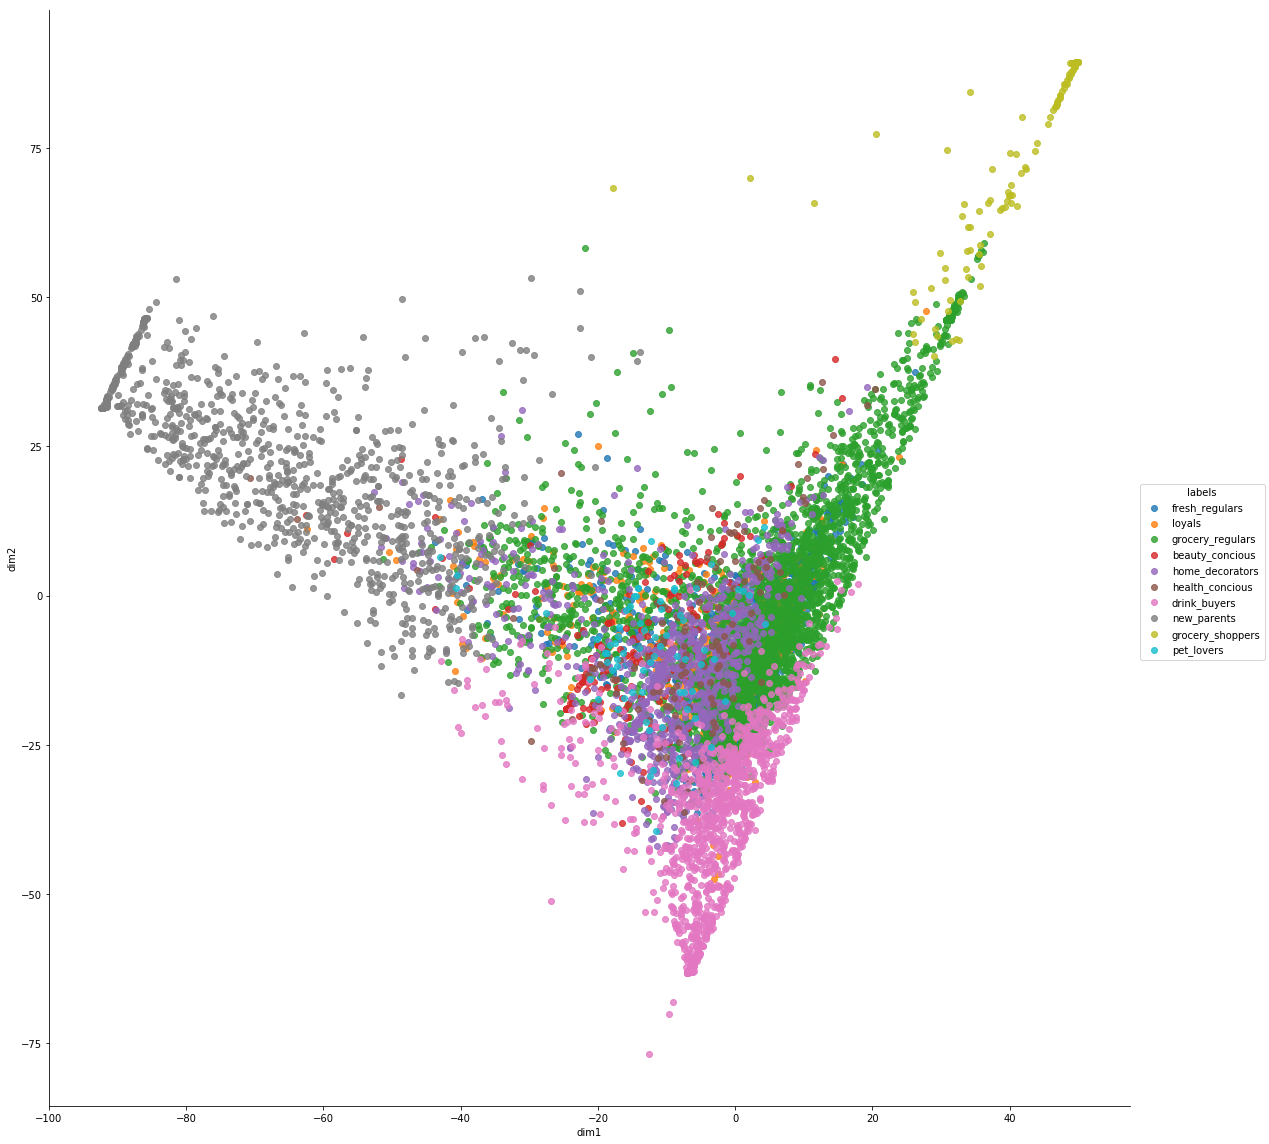

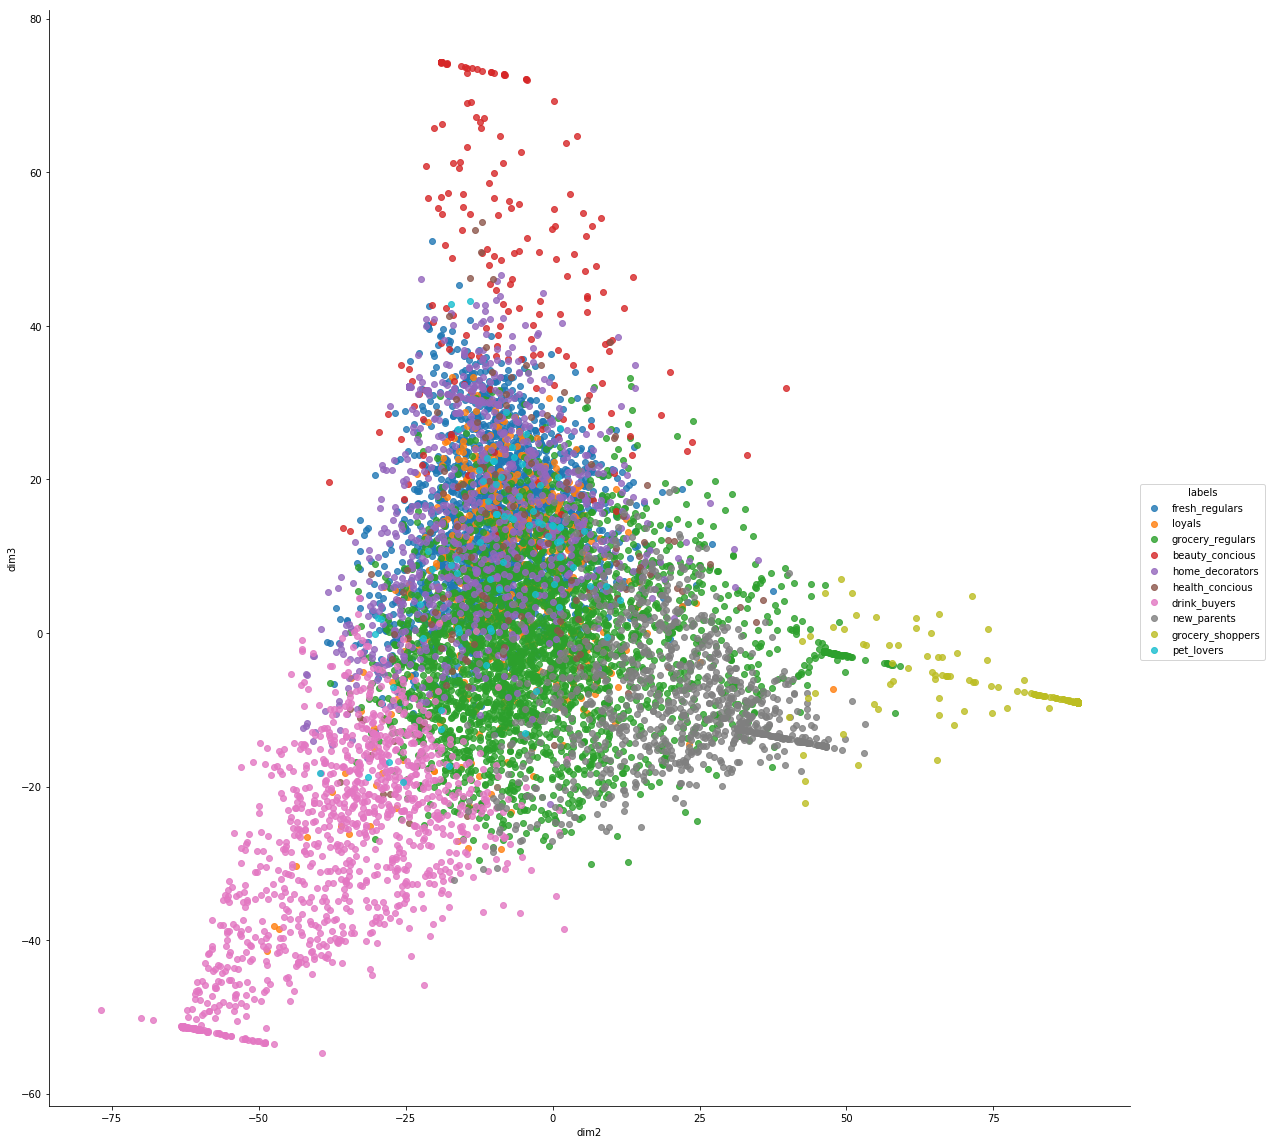

In [94]:
pca_2d_plot_labels(pca, df, frame)

In [95]:
frame.to_csv('customer_segmentation.csv')

In [3]:
frame = pd.read_csv('customer_segmentation.csv')

In [4]:
frame.groupby('class')['num_orders'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
beauty_concious,208.0,1.350962,0.826435,1.0,1.0,1.0,1.00,6.0
drink_buyers,1151.0,2.447437,1.762550,1.0,1.0,2.0,3.00,15.0
fresh_regulars,1877.0,3.004795,2.016055,1.0,1.0,2.0,4.00,9.0
grocery_regulars,3047.0,2.713160,1.825020,1.0,1.0,2.0,4.00,9.0
grocery_shoppers,387.0,1.211886,0.530484,1.0,1.0,1.0,1.00,5.0
health_concious,132.0,1.689394,1.870350,1.0,1.0,1.0,1.25,15.0
home_decorators,909.0,1.676568,1.217037,1.0,1.0,1.0,2.00,16.0
loyals,575.0,12.793043,4.718629,7.0,10.0,12.0,15.00,52.0
new_parents,992.0,2.155242,1.508835,1.0,1.0,2.0,3.00,11.0


-> Note that in the loyals class the minimum number of orders itself is 7.<br>
-> Regulars, drink_buyers and new_parents have pretty impressive order counts as well.

In [5]:
frame.groupby('class')['num_orders'].mean().sort_values(ascending=False)

class
loyals              12.793043
fresh_regulars       3.004795
grocery_regulars     2.713160
drink_buyers         2.447437
new_parents          2.155242
pet_lovers           1.907895
health_concious      1.689394
home_decorators      1.676568
beauty_concious      1.350962
grocery_shoppers     1.211886
Name: num_orders, dtype: float64

-> The grocery shoppers being at the lowest for mean number of orders again supports the hypothesis that the people who bought on discount churned.